In [359]:
#Charger les bibliothèques
import warnings
warnings.filterwarnings("ignore")
import pandas as pd

In [360]:
#Étape 1
#1. Téléchargez le contenu de la base de données.
df=pd.read_csv("spambase.txt", delimiter = "\t")
df.head()

,wf_make,wf_address,wf_all,wf_3d,wf_our,wf_over,wf_remove,wf_internet,wf_order,wf_mail,...,cf_bracket,cf_sqbracket,cf_exclam,cf_dollar,cf_hash,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam,status
0,0.00,0.52,0.52,0.0,0.52,0.00,0.0,0.00,0.00,0.0,...,0.192,0.000,0.867,0.000,0.0,2.220,20,131,yes,train
1,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.0,...,0.000,0.000,0.398,0.000,0.0,1.181,5,26,no,train
2,0.00,0.00,0.66,0.0,0.00,0.66,0.0,0.00,0.00,0.0,...,0.000,0.000,0.000,0.000,0.0,1.142,4,56,no,train
3,0.08,0.00,0.16,0.0,0.00,0.08,0.0,0.08,0.73,0.0,...,0.172,0.057,0.000,0.022,0.0,3.212,44,665,no,train
4,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.0,...,0.000,0.000,0.000,0.000,0.0,1.000,1,3,no,train


In [361]:
# 4601 observations et 57 colonnes 
df.shape

(4601, 57)

In [362]:
# nbr de spam et non spam
df.spam.value_counts()

no     2788
yes    1813
Name: spam, dtype: int64

In [363]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   wf_make                     4601 non-null   float64
 1   wf_address                  4601 non-null   float64
 2   wf_all                      4601 non-null   float64
 3   wf_3d                       4601 non-null   float64
 4   wf_our                      4601 non-null   float64
 5   wf_over                     4601 non-null   float64
 6   wf_remove                   4601 non-null   float64
 7   wf_internet                 4601 non-null   float64
 8   wf_order                    4601 non-null   float64
 9   wf_mail                     4601 non-null   float64
 10  wf_receive                  4601 non-null   float64
 11  wf_will                     4601 non-null   float64
 12  wf_people                   4601 non-null   float64
 13  wf_report                   4601 

In [364]:
#Pour changer spam et status en 0 et 1 au lieu de yes no et train test
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}') 
print_unique_col_values(df)

spam: ['yes' 'no']
status: ['train' 'test']


In [365]:
df['spam'].replace({'yes':1,'no':0},inplace=True)
df['status'].replace({'train':1,'test':0},inplace=True)

In [366]:
df.spam.unique()

array([1, 0], dtype=int64)

In [367]:
df.status.unique()

array([1, 0], dtype=int64)

In [368]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   wf_make                     4601 non-null   float64
 1   wf_address                  4601 non-null   float64
 2   wf_all                      4601 non-null   float64
 3   wf_3d                       4601 non-null   float64
 4   wf_our                      4601 non-null   float64
 5   wf_over                     4601 non-null   float64
 6   wf_remove                   4601 non-null   float64
 7   wf_internet                 4601 non-null   float64
 8   wf_order                    4601 non-null   float64
 9   wf_mail                     4601 non-null   float64
 10  wf_receive                  4601 non-null   float64
 11  wf_will                     4601 non-null   float64
 12  wf_people                   4601 non-null   float64
 13  wf_report                   4601 

In [369]:
#2. Formez les deux sousensembles de données spam_train et spam_test
spam_train = df.loc[df.status == 1, :]
spam_test = df.loc[df.status == 0, :]

In [370]:
spam_train.status.unique()

array([1], dtype=int64)

In [371]:
spam_test.status.unique()

array([0], dtype=int64)

In [372]:
#3. Réalisez une standardisation des deux sous-ensembles des données
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [373]:
list(df.columns)

['wf_make',
 'wf_address',
 'wf_all',
 'wf_3d',
 'wf_our',
 'wf_over',
 'wf_remove',
 'wf_internet',
 'wf_order',
 'wf_mail',
 'wf_receive',
 'wf_will',
 'wf_people',
 'wf_report',
 'wf_addresses',
 'wf_free',
 'wf_business',
 'wf_email',
 'wf_you',
 'wf_credit',
 'wf_your',
 'wf_font',
 'wf_000',
 'wf_money',
 'wf_hp',
 'wf_hpl',
 'wf_lab',
 'wf_labs',
 'wf_telnet',
 'wf_857',
 'wf_data',
 'wf_415',
 'wf_85',
 'wf_technology',
 'wf_1999',
 'wf_parts',
 'wf_pm',
 'wf_direct',
 'wf_cs',
 'wf_meeting',
 'wf_original',
 'wf_project',
 'wf_re',
 'wf_edu',
 'wf_table',
 'wf_conference',
 'cf_comma',
 'cf_bracket',
 'cf_sqbracket',
 'cf_exclam',
 'cf_dollar',
 'cf_hash',
 'capital_run_length_average',
 'capital_run_length_longest',
 'capital_run_length_total',
 'spam',
 'status']

In [374]:
df.columns_to_scale = ['wf_make', 'wf_address','wf_all', 'wf_3d', 'wf_our','wf_over', 'wf_remove',
                       'wf_internet', 'wf_order', 'wf_mail', 'wf_receive', 'wf_will', 'wf_people',
                       'wf_report','wf_addresses', 'wf_free', 'wf_business', 'wf_email', 'wf_you',
                       'wf_credit', 'wf_your', 'wf_font', 'wf_000', 'wf_money', 'wf_hp', 'wf_hpl',
                       'wf_lab', 'wf_labs', 'wf_telnet', 'wf_857', 'wf_data', 'wf_415', 'wf_85',
                       'wf_technology', 'wf_1999', 'wf_parts', 'wf_pm','wf_direct', 'wf_cs', 
                       'wf_meeting', 'wf_original','wf_project', 'wf_re', 'wf_edu', 'wf_table',
                       'wf_conference', 'cf_comma', 'cf_bracket', 'cf_sqbracket', 'cf_exclam',
                       'cf_dollar', 'cf_hash','capital_run_length_average', 
                       'capital_run_length_longest','capital_run_length_total',]

In [375]:
cols_to_scale=list(df.columns_to_scale)

In [376]:
spam_train[cols_to_scale] = scaler.fit_transform(spam_train[cols_to_scale])

In [377]:
spam_test[cols_to_scale] = scaler.fit_transform(spam_test[cols_to_scale])

In [378]:
for col in spam_train:
    print(f'{col}: {spam_train[col].unique()}')

wf_make: [-3.42177551e-01 -8.56467934e-02  9.40476237e-01  1.80626754e+00
  2.28726271e+00  1.77420120e+00  6.19812790e-01  1.13287430e+00
 -5.35804488e-02 -2.15141041e-02  1.26113968e+00  2.12693099e+00
 -1.81845828e-01  1.54973679e+00  1.03667527e+00  7.46849300e-02
  9.08409892e-01  2.67082998e-01  1.32527237e+00  2.02950309e-01
  1.38817619e-01  4.37157512e+00  6.45588752e+00 -1.17713138e-01
  1.29320603e+00  1.19700699e+00  2.99149343e-01  1.05522406e-02
  1.74213485e+00  4.59481066e-01  2.38346175e+00  1.06751275e-01
  1.87040023e+00  2.19106368e+00  2.99272230e+00  3.95348377e-01
  3.31215687e-01  2.09486465e+00  8.44277202e-01  5.55680100e-01
 -1.49779483e-01  7.16011824e-01  5.23613756e-01  1.90246658e+00
  3.40958478e+00  2.86445692e+00  1.83833389e+00  6.07109139e+00
  1.16494065e+00  2.15899733e+00  3.05685499e+00  2.44759444e+00
  1.64593582e+00  1.48560410e+00  1.96659927e+00  4.26185853e-02
  2.80032423e+00  1.71006851e+00  7.48078168e-01 -3.10111206e-01
  6.83945479e-01

In [379]:
#4. Déterminez la taille des deux sous-ensembles de données.
# pour le spam_train 3601 observations et 57 colonnes 
spam_train.shape

(3601, 57)

In [380]:
# pour le spam_test 1000 observations et 57 colonnes 
spam_test.shape

(1000, 57)

In [381]:
#5. A l’aide d’un diagramme de dispersion de paires de variables par classes (spam), représentez la dispersion des 6 premières variables.
#J'ai fait par deux façons pour les deux sous-ensembles de données 

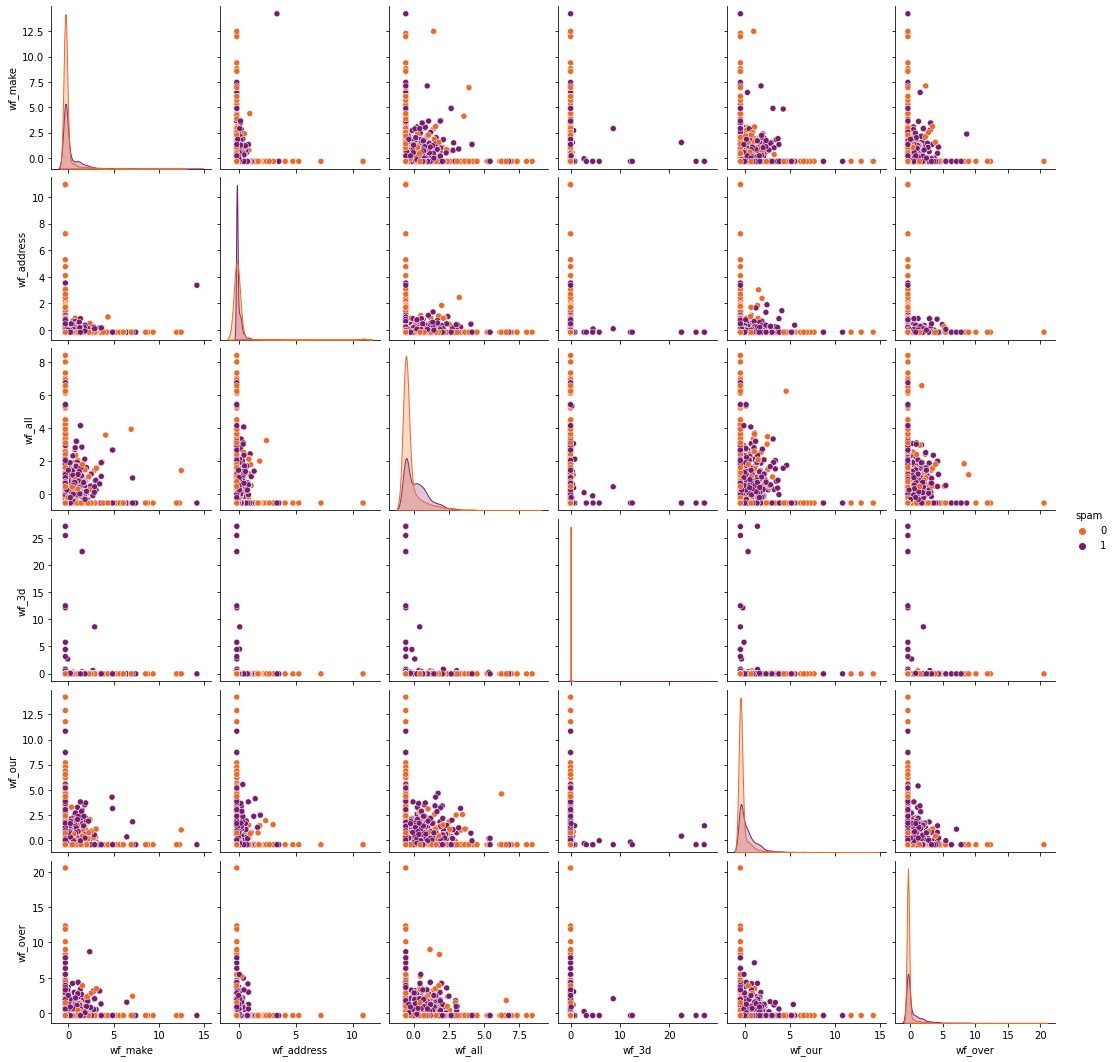

In [382]:
import seaborn as sns
sns.pairplot(spam_train[spam_train.spam.isin([0,1])], 
             hue='spam', 
             vars=['wf_make', 'wf_address', 'wf_all', 'wf_3d', 'wf_our', 'wf_over' ], 
             palette='inferno_r'
            );

<AxesSubplot:xlabel='wf_make', ylabel='spam'>

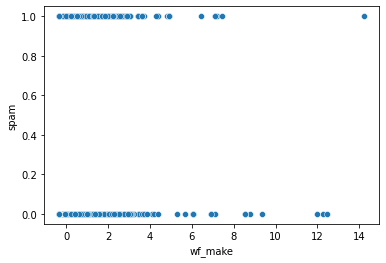

In [383]:
sns.scatterplot(spam_train["wf_make"], spam_train['spam'])

<AxesSubplot:xlabel='wf_address', ylabel='spam'>

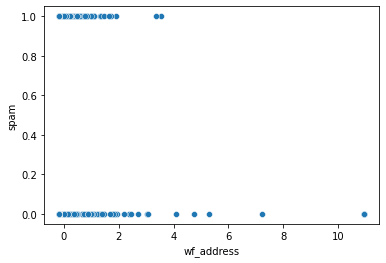

In [384]:
sns.scatterplot(spam_train["wf_address"], spam_train['spam'])

<AxesSubplot:xlabel='wf_all', ylabel='spam'>

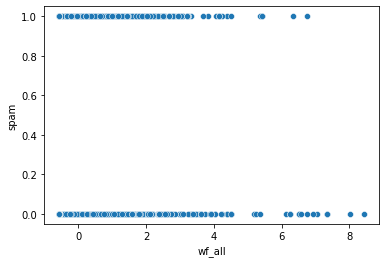

In [385]:
sns.scatterplot(spam_train["wf_all"], spam_train['spam'])

<AxesSubplot:xlabel='wf_3d', ylabel='spam'>

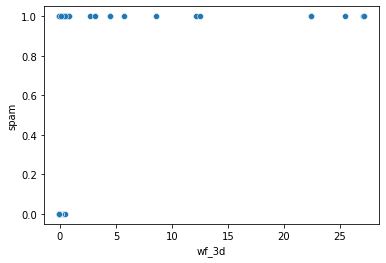

In [386]:
sns.scatterplot(spam_train["wf_3d"], spam_train['spam'])

<AxesSubplot:xlabel='wf_our', ylabel='spam'>

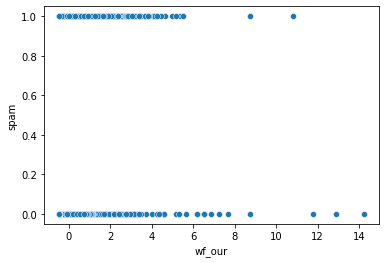

In [387]:
sns.scatterplot(spam_train["wf_our"], spam_train['spam'])

<AxesSubplot:xlabel='wf_over', ylabel='spam'>

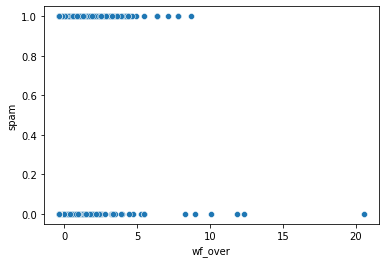

In [388]:
sns.scatterplot(spam_train["wf_over"], spam_train['spam'])

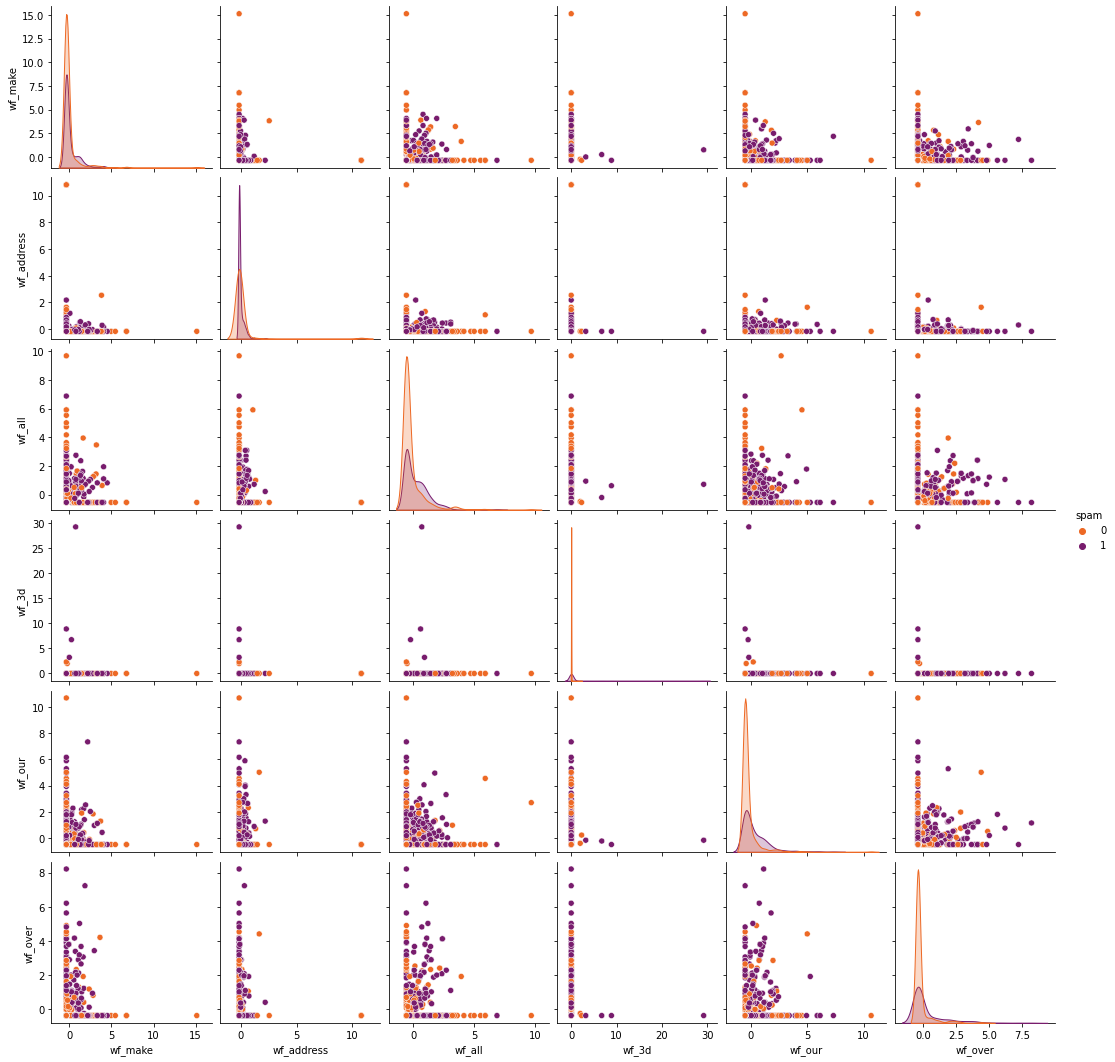

In [389]:
sns.pairplot(spam_test[spam_test.spam.isin([0,1])], 
             hue='spam', 
             vars=['wf_make', 'wf_address', 'wf_all', 'wf_3d', 'wf_our', 'wf_over' ], 
             palette='inferno_r'
            );

<AxesSubplot:xlabel='wf_make', ylabel='spam'>

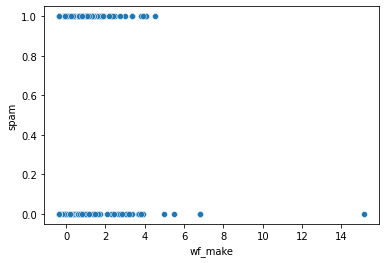

In [390]:
sns.scatterplot(spam_test["wf_make"], spam_test['spam'])

<AxesSubplot:xlabel='wf_address', ylabel='spam'>

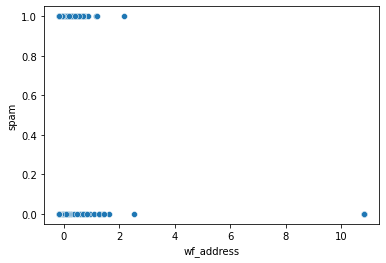

In [391]:
sns.scatterplot(spam_test["wf_address"], spam_test['spam'])

<AxesSubplot:xlabel='wf_all', ylabel='spam'>

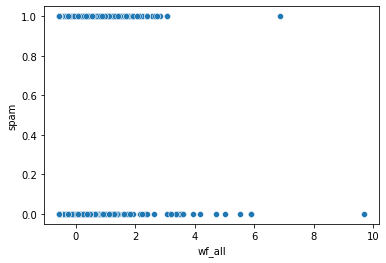

In [392]:
sns.scatterplot(spam_test["wf_all"], spam_test['spam'])

<AxesSubplot:xlabel='wf_3d', ylabel='spam'>

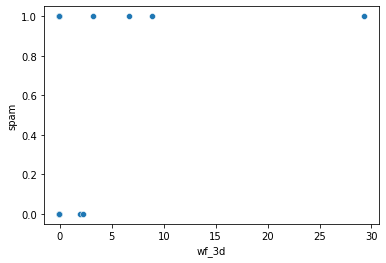

In [393]:
sns.scatterplot(spam_test["wf_3d"], spam_test['spam'])

<AxesSubplot:xlabel='wf_our', ylabel='spam'>

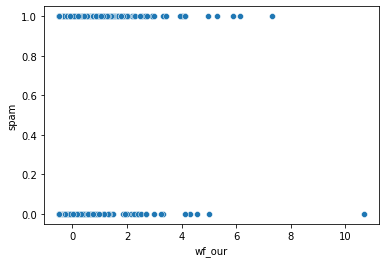

In [394]:
sns.scatterplot(spam_test["wf_our"], spam_test['spam'])

<AxesSubplot:xlabel='wf_over', ylabel='spam'>

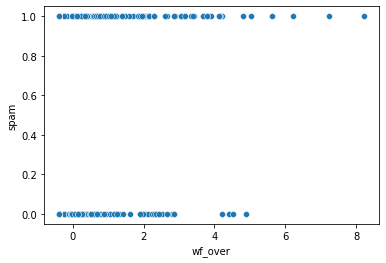

In [395]:
sns.scatterplot(spam_test["wf_over"], spam_test['spam'])

In [396]:
#6. Pourriez-vous extraire des informations préliminaires sur l’importance (pouvoir discriminant) de ces variables.
#Selon les diagrammes de la question 5 on constate que les 6 variables 
#n'ont pas un pouvoir discriminat pour classifier est ce que 
#c'est un spam ou non

In [397]:
#Étape 2
#1. Réalisez un encodage de la variable cible en vue d’une régression logistique.
#J'ai déja fait ds la question 1 Étape 1

<AxesSubplot:xlabel='wf_cs', ylabel='spam'>

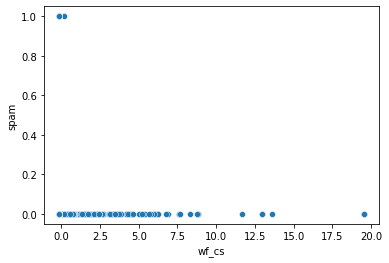

In [398]:
#2. Représentez la dispersion de la variable cible (spam) encodée en fonctionde la variable wf_cs.
sns.scatterplot(spam_train["wf_cs"], spam_train['spam'])

<AxesSubplot:xlabel='wf_cs', ylabel='spam'>

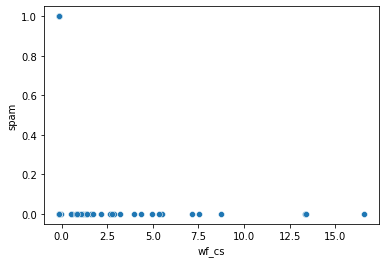

In [399]:
sns.scatterplot(spam_test["wf_cs"], spam_test['spam'])

In [400]:
# nbr de spam et non spam
spam_train.spam.value_counts()

0    2179
1    1422
Name: spam, dtype: int64

In [401]:
# nbr de spam et non spam
spam_test.spam.value_counts()

0    609
1    391
Name: spam, dtype: int64

In [402]:
#selon le nombre de spam ou non je considère que j'ai un data sets 
#balancé entre les 2 classes 

In [403]:
#3. entrainez un modèle de régressionlogistique sur l’ensemble des données d’entrainement (Standardisées).
X_train = spam_train.loc[:, spam_train.columns == 'wf_cs']
y_train = (spam_train.loc[:, spam_train.columns == 'spam']).astype(np.int)

In [404]:
X_train

,wf_cs
0,-0.120832
1,2.795724
2,-0.120832
3,-0.120832
4,-0.120832
...,...
3596,-0.120832
3597,-0.120832
3598,-0.120832
3599,-0.120832


In [405]:
y_train

,spam
0,1
1,0
2,0
3,0
4,0
...,...
3596,0
3597,1
3598,1
3599,0


In [406]:
from sklearn.linear_model import LogisticRegression
# instantiate the model
log_reg = LogisticRegression(solver="liblinear",random_state=20)
# fit the model with data
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=20, solver='liblinear')

In [407]:
#4. Déterminez les paramètres du modèle et écrivez l’équation du modèle de régression.
log_reg.coef_

array([[-2.53219445]])

In [408]:
log_reg.intercept_

array([-0.68334886])

In [409]:
# Equation : 1 / (1 + e-(-2.532 x wf_cs - 0.683))

In [410]:
# 5. Représentez la frontière de décision.

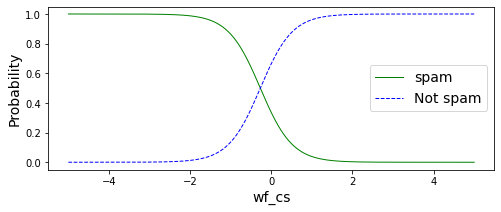

In [411]:
X_new = np.linspace(-5, 5, 10000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.figure(figsize=(8, 3))
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=1, label="spam")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=1, label="Not spam")
plt.xlabel("wf_cs", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center right", fontsize=14)

In [412]:
spam_train['wf_cs']

0      -0.120832
1       2.795724
2      -0.120832
3      -0.120832
4      -0.120832
          ...   
3596   -0.120832
3597   -0.120832
3598   -0.120832
3599   -0.120832
3600   -0.120832
Name: wf_cs, Length: 3601, dtype: float64

In [414]:
#6. Déterminez la probabilité d’appartenance à la classe (spam) de l’observation dont la valeur de wf_cs = 1.07
log_reg.predict_proba((np.array([2.795724]).reshape(1, -1)))

array([[9.99574860e-01, 4.25140488e-04]])

In [415]:
# 7. Déterminez la classe d’appartenance de l’observation dont la valeur de wf_cs = 1.07
log_reg.predict(np.array([2.795724]).reshape(1, -1))

array([0])

In [ ]:
# proba de 100% qu'il soit dans la classe 0 (non spam) 

In [416]:
#Étape 3

In [417]:
#1. En utilisant la libraire Sklearn, développez un perceptron simple pour prédire la classe (spam)

In [418]:
y_train = (spam_train.loc[:, spam_train.columns == 'spam']).astype(np.int)
y_test = (spam_test.loc[:, spam_test.columns == 'spam']).astype(np.int)

In [419]:
spam_train.drop('spam',axis='columns',inplace=True)
spam_test.drop('spam',axis='columns',inplace=True)
spam_train.drop('status',axis='columns',inplace=True)
spam_test.drop('status',axis='columns',inplace=True)

In [420]:
X_train = spam_train
X_test = spam_test
X_train = spam_train
X_test = spam_test

In [425]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((3601, 55), (3601, 1), (1000, 55), (1000, 1))

In [422]:
from sklearn.linear_model import Perceptron
per_clf = Perceptron(max_iter=1500, tol=1e-3, random_state=100)
per_clf.fit(X_train, y_train)

Perceptron(max_iter=1500, random_state=100)

In [ ]:
#2. Représentez la matrice de confusion et évaluez les performances. Déterminez la valeur du score F1.

In [426]:
y_pred = per_clf.predict(X_test)

In [427]:
#Taux de classification
#Le score en train est
acc_per_clf = round(per_clf.score(X_train, y_train) * 100, 2)
acc_per_clf

90.42

In [443]:
#Le score en test est
acc_per_clf = round(per_clf.score(X_test, y_test) * 100, 2)
acc_per_clf

89.5

In [429]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.94      0.92       609
           1       0.90      0.82      0.86       391

    accuracy                           0.90      1000
   macro avg       0.90      0.88      0.89      1000
weighted avg       0.90      0.90      0.89      1000



Text(69.0, 0.5, 'Truth')

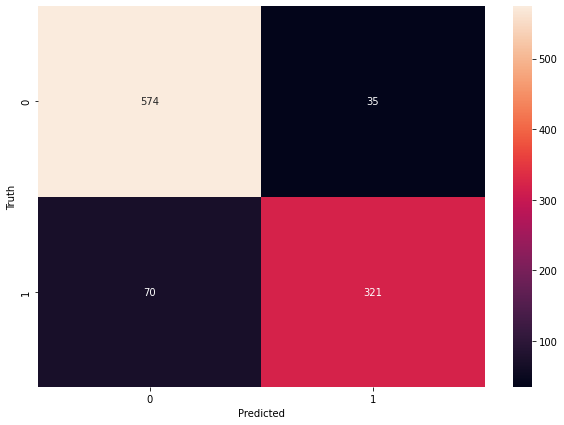

In [433]:
import seaborn as sn
import tensorflow as tf
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
#Evalution 
#Accuracy est 0.90
#Precision for 0 class. i.e. email not spam 0.89
#Precision for 1 class. i.e. email spam 0.90

In [436]:
#score F1 est 0.86 pour la classe spam

In [438]:
round(321/(321+35),2)

0.9

In [439]:
round(321/(321+70),2)

0.82

In [442]:
round(2*(0.9*0.82)/(0.9+0.82),2)

0.86

In [423]:
#3. Quelle est la valeur du biais du modèle de perceptron obtenu ?
# Valeur de la constante
per_clf.intercept_

array([-22.])

In [ ]:
#la valeur du biais du modèle de perceptron obtenu est -22

In [424]:
#4. Combien de paramètres possède ce modèle. Pourquoi ?
# Les coefficients de pondérations des caractéristiques
per_clf.coef_

array([[ -3.95184528,  -1.40315146,   4.28014471,  11.40719624,
          7.26399754,  -3.0121281 ,  10.88569882,   5.58413146,
          5.796318  ,  -6.80817886,  -2.73447976,  -4.23956109,
         -2.16463239,  -1.43774853,   0.19409014,   4.12271123,
          5.59346188,  -2.32473819,   3.24473196,  15.15295824,
         -2.9288217 ,  12.61707684,  12.31147262,   7.44957218,
        -31.03717885,  -3.49107346, -11.19818362,   1.03035167,
         -8.75456002,  -6.99484519, -10.07043762,   3.31002822,
        -15.06302674,   4.37791941,  -0.82638781,  -1.17969429,
         -5.5984673 ,  -2.12673477, -23.20549165, -17.51083714,
         -5.02549048, -11.77220467, -10.62145994, -13.09480344,
        -14.77214077, -10.36882527, -12.98661175,   0.68680832,
        -12.02872532,   3.77678887,  18.36335862,  10.45027676,
          0.44486978,  19.17865154,   3.14586981]])

In [ ]:
#il posséde 55 coefficients car nous avons 55 variables 

In [ ]:
#5. En se basant sur les poids synaptique, réalisez un ordonnancement de
#l’importance des caractéristiques. Justifiez la faisabilité de l’ordonnancement
#des caractéristiques à partir des poids synaptiques.

#6. Représentez graphiquement l’importance des caractéristiques. Interprétez
#les résultats. Quelles sont les caractéristiques les plus importantes (discriminantes).

In [ ]:
#Les pondérations associées à chaque caractéristique traduisent l'importance de cette 
#caractéristique dans la prédiction de la valeur de sortie. Les entités dont les poids sont 
#proches de zéro sont considérées comme ayant une importance moindre dans le processus 
#de prédiction par rapport aux entités dont les poids ont une valeur plus élevée en valeur absolue
#exemple 'capital_run_length_longest'et'capital_run_length_total' aussi 'wf_make' et 'wf_address'

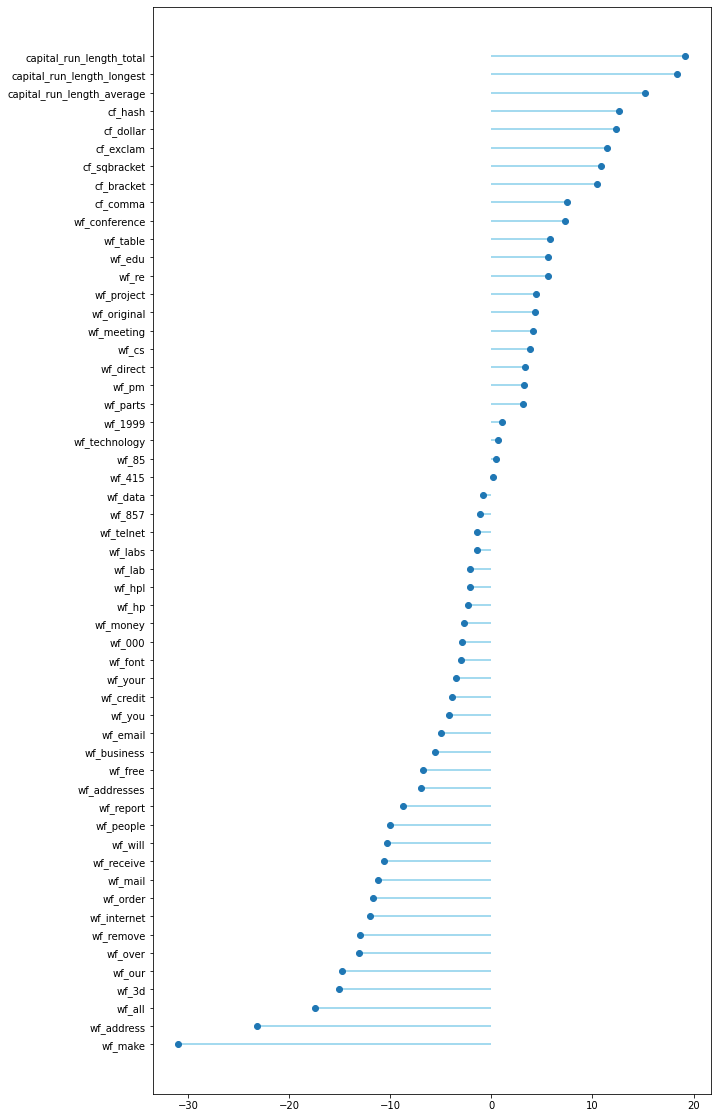

In [482]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize = (10,20))
x11 = ['wf_make', 'wf_address','wf_all', 'wf_3d', 'wf_our','wf_over', 'wf_remove',
                       'wf_internet', 'wf_order', 'wf_mail', 'wf_receive', 'wf_will', 'wf_people',
                       'wf_report','wf_addresses', 'wf_free', 'wf_business', 'wf_email', 'wf_you',
                       'wf_credit', 'wf_your', 'wf_font', 'wf_000', 'wf_money', 'wf_hp', 'wf_hpl',
                       'wf_lab', 'wf_labs', 'wf_telnet', 'wf_857', 'wf_data', 'wf_415', 'wf_85',
                       'wf_technology', 'wf_1999', 'wf_parts', 'wf_pm','wf_direct', 'wf_cs', 
                       'wf_meeting', 'wf_original','wf_project', 'wf_re', 'wf_edu', 'wf_table',
                       'wf_conference', 'cf_comma', 'cf_bracket', 'cf_sqbracket', 'cf_exclam',
                       'cf_dollar', 'cf_hash','capital_run_length_average', 
                       'capital_run_length_longest','capital_run_length_total']
y11 = ([ -3.95184528,  -1.40315146,   4.28014471,  11.40719624,
          7.26399754,  -3.0121281 ,  10.88569882,   5.58413146,
          5.796318  ,  -6.80817886,  -2.73447976,  -4.23956109,
         -2.16463239,  -1.43774853,   0.19409014,   4.12271123,
          5.59346188,  -2.32473819,   3.24473196,  15.15295824,
         -2.9288217 ,  12.61707684,  12.31147262,   7.44957218,
        -31.03717885,  -3.49107346, -11.19818362,   1.03035167,
         -8.75456002,  -6.99484519, -10.07043762,   3.31002822,
        -15.06302674,   4.37791941,  -0.82638781,  -1.17969429,
         -5.5984673 ,  -2.12673477, -23.20549165, -17.51083714,
         -5.02549048, -11.77220467, -10.62145994, -13.09480344,
        -14.77214077, -10.36882527, -12.98661175,   0.68680832,
        -12.02872532,   3.77678887,  18.36335862,  10.45027676,
          0.44486978,  19.17865154,   3.14586981])
y11.sort()
my_range=range(1,len(x11)+1)
plt.hlines(y=x11, xmin = 0 , xmax = y11, color='skyblue')
plt.plot(y11, x11, "o")
plt.show()

In [466]:
y11 = np.linspace(1, (np.log(0.2 * np.pi)), 10)
y11

array([ 1.        ,  0.83725466,  0.67450933,  0.51176399,  0.34901865,
        0.18627332,  0.02352798, -0.13921735, -0.30196269, -0.46470803])

In [ ]:
#7. En utilisant la libraire Sklearn, développez un perceptron multicouche
#(hidden_layer_sizes=(2),activation=’logistic’,random_state=100,max_iter=1500).

In [445]:
from sklearn.neural_network import MLPClassifier
clf_MLC = MLPClassifier(hidden_layer_sizes=(2),activation='logistic',max_iter=1500, random_state=100)
clf_MLC.fit(X_train, y_train)

MLPClassifier(activation='logistic', hidden_layer_sizes=2, max_iter=1500,
              random_state=100)

In [446]:
#8. Représentez la matrice de confusion et évaluez les performances.
#Taux de classification
train_score = clf_MLC.score(X_train, y_train)
print("Le score en train est {}".format(train_score))
test_score = clf_MLC.score(X_test, y_test)
print("Le score en test est {}".format(test_score))

Le score en train est 0.937795056928631
Le score en test est 0.919


In [449]:
y_pred = clf_MLC.predict(X_test)

In [450]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.95      0.93       609
           1       0.92      0.87      0.89       391

    accuracy                           0.92      1000
   macro avg       0.92      0.91      0.91      1000
weighted avg       0.92      0.92      0.92      1000



Text(69.0, 0.5, 'Truth')

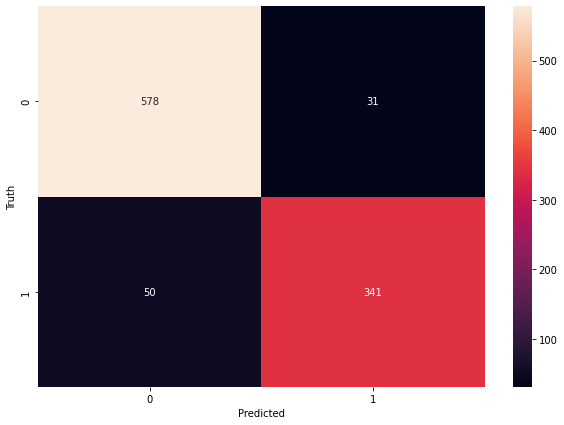

In [451]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
#9. Comparez les performances du perceptron simple avec le perceptron multi-couche.
# On constate que le perceptron multi-couche et plus performant que perceptron simple il a de 0.92 vs 0.90
# ussi la Precision pour la class 0 0.92 vs 0.89
# Aussi la Precision pour la class 1 0.92 vs 0.90
# Aussi le score F1 est 0.89 vs 0.86 pour la classe spam